# Funções para prever progressão polinomial

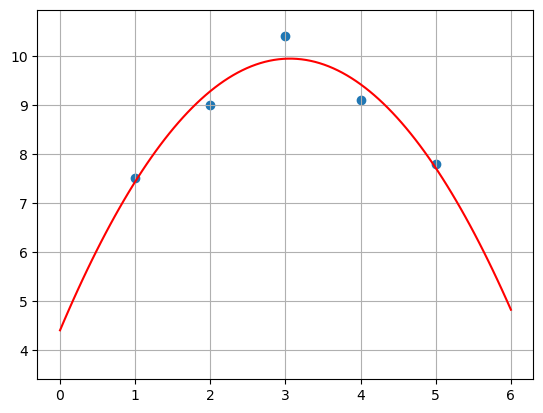

4.399999999999994  +3.627142857142861x**1 -0.5928571428571435x**2
RPM 3.060000000000002	Km 9.94778000000000


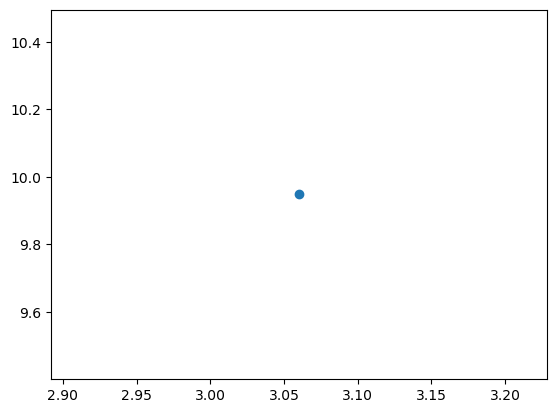

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



def main():
    x = [1,2,3,4,5]
    y = [7.5,9,10.4,9.1,7.8]
    grau = 2
    cord_x, cord_y = plano_cart(x, y)
    plot_x, plot_y, an, c = f(cord_x, cord_y, grau)
    plot_plano(plot_x, plot_y, x, y, grau)
    eq_formatada(an,c)
    formula(an,c,x)
    
    
def plano_cart(listax:list, listay:list) -> list:
    """
     Transforma a lista 1D em 2D
    :param listax: Valores em x
    :type listax: lista
    :return : matriz em 2D
    :rtype : lista
    """
    if len(listax) == len(listay):
        x = np.array([listax]).reshape(-1,1)
        y = np.array([listay]).reshape(-1,1)
    else:
        print("Tamanho das listas está diferente")
    return (x, y)


def f(x:list, y:list, grau:int) -> list:
    """
    Regressão linear e polinomial
    :param x,y: valores formatados em 2D
    :param grau: inteiro
    :return: lista com os valores polinomiais treinados com os valores 
            originais (x,y), e os coeficientes x^1,x^2,...x^n, 
            intercept que representa o valor sem a variável.
    :rtype :  list 
    """
    poly_features = PolynomialFeatures(degree = grau, include_bias = False)
    X_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(X_poly, y)
    X_vals = np.linspace(np.min(x) - 1,np.max(x) + 1,100).reshape(-1,1)
    X_vals_poly = poly_features.transform(X_vals)
    y_vals = model.predict(X_vals_poly)
    coeficientes = model.coef_
    intercept = model.intercept_
    return (X_vals, y_vals, coeficientes, intercept)


def plot_plano(cord_x:list, cord_y:list,x:list, y:list, grau):
    """
    Plota os gráficos das coordenadas e da regressão polinomial
    :param cord_x: coordenadas x, já treinadas
    :param cord_y: coordenadas y, já treinadas
    :return : None
    """
    if 0 < grau <9:
        plt.scatter(x,y)
        plt.plot(cord_x, cord_y, color="r")
        plt.ylim(np.min(cord_y) - 1, np.max(cord_y) + 1)
        plt.grid(True, which = "both")
        plt.show()
    else:
        plt.scatter(x,y)
        plt.plot(cord_x, cord_y, color="r")
        plt.ylim(-20,50)
        plt.grid(True, which = "both")
        plt.show()

    
def eq_formatada(coeficientes:list, plano_corte:list) -> None:
    """
    Formatação da Equação Polinomial encontrada
    :param coeficientes: uma lista com os valores retornados já treinados
    :param plano_corte: uma lista com um valor, termo independente
    :return : None
    """
    fold_x = []
    for i in range(len(coeficientes[0])):
        if coeficientes[0][i] == 0:
            pass
        else:
            fold_x.append(coeficientes[0][i])
    x = sym.symbols('x')
    formula = ''
    for i in range(len(fold_x)):
        if fold_x[i] > 0 :
            formula += f" +{fold_x[i]}{x}**{i+1}"
        else:
            formula += f" {fold_x[i]}{x}**{i+1}"
    print(plano_corte[0],formula)

    
def formula(coeficientes:list, plano_corte:list, listax:list) -> None:
    sym.init_printing("mathjax")
    x = sym.symbols("x")
    fold_dict = {}
    formula = 0
    fold_dict[0] = plano_corte[0] # no dic o 1º valor é o termo indep.
    
    for valor in range(len(coeficientes[0])):
        # com essa iteração popula a formula 
        fold_dict[valor + 1] = coeficientes[0][valor]*x**(valor + 1)    
    for value in fold_dict.values():
        formula += value
    dados_x = np.arange(min(listax), max(listax)+ .1,.01)
    dados_y = []
    
    for i in dados_x:
        dados_y.append(formula.subs(x, i))
    
    dados_dicionario_completo = dict()
    for i in range(len(dados_x)):
        dados_dicionario_completo[dados_x[i]] = dados_y[i]
        #print(f"{i+1}\t{dados_x[i]:.3f} : {dados_y[i]:.4f}")
    m = max(dados_dicionario_completo, key=lambda x:dados_dicionario_completo[x])
    print(f"RPM {m}\tKm {dados_dicionario_completo[m]}")
    
    
        
if __name__=="__main__":
    main()